In [1]:
pip install git+https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git

  Cloning https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to /tmp/pip-req-build-vcw1oedh
  Running command git clone --filter=blob:none --quiet https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git /tmp/pip-req-build-vcw1oedh
  Resolved https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to commit c8db57376f9955954750b32781958c406ddd98af
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import QuantumCircuit
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import random
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import seaborn as sns

In [3]:
data = pd.read_csv("galaxia_mod.csv",  low_memory=False )
data.head()

,spiral=1 elliptical=0,TType,K,C,A,S,G2,H
0,1,2.4552721977200003,18.523393,0.377586,0.820991,0.872967,1.646847,0.753667
1,1,0.694034576416,9.387313,0.481648,0.918934,0.811223,1.558076,0.695033
2,0,-2.00281715393,6.437712,0.468097,0.896377,0.890470,1.273454,0.633161
3,1,5.85847759247,18.569745,0.324003,0.763444,0.852662,1.793868,0.848901
4,0,-2.60113668442,9.625444,0.464912,0.868397,0.849914,0.667866,0.511509


In [4]:
data.describe()

,spiral=1 elliptical=0,K,C,A,S,G2,H
count,215685.000000,215685.000000,215685.000000,215685.000000,215685.000000,215685.000000,215685.000000
mean,0.764587,25.406791,0.401830,0.205761,-0.037719,1.139084,0.659775
std,0.424257,28.264375,0.082345,77.639939,88.783438,30.458641,0.121579
min,0.000000,1.837874,0.024179,-9999.999999,-9999.999999,-9999.999999,0.000000
25%,1.000000,10.590638,0.338449,0.759212,0.731927,0.934499,0.582985
50%,1.000000,17.074259,0.390940,0.835924,0.831722,1.384198,0.675640
75%,1.000000,29.294805,0.457412,0.886775,0.878971,1.620547,0.757010
max,1.000000,809.764048,0.799674,0.987282,0.970691,1.939811,0.912344


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215685 entries, 0 to 215684
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   spiral=1 elliptical=0  215685 non-null  int64  
 1   TType                  215685 non-null  object 
 2   K                      215685 non-null  float64
 3   C                      215685 non-null  float64
 4   A                      215685 non-null  float64
 5   S                      215685 non-null  float64
 6   G2                     215685 non-null  float64
 7   H                      215685 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.2+ MB


vemos q TType es un dato objeto por lo que veremos si es compresensible trasformarlo a variables dummy, sin que se agrande tanto el dataset

lo que hice al final fue transformarlo a variable float era object dado que tenia 2 mal tipeados y tenian otros simbolos

In [6]:
data['TType'] = pd.to_numeric(data['TType'], errors='coerce')

In [7]:
data.isnull().sum()

,0
spiral=1 elliptical=0,0
TType,2
K,0
C,0
A,0
S,0
G2,0
H,0


In [8]:
data=data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215683 entries, 0 to 215684
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   spiral=1 elliptical=0  215683 non-null  int64  
 1   TType                  215683 non-null  float64
 2   K                      215683 non-null  float64
 3   C                      215683 non-null  float64
 4   A                      215683 non-null  float64
 5   S                      215683 non-null  float64
 6   G2                     215683 non-null  float64
 7   H                      215683 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 14.8 MB


In [10]:
data=data.drop_duplicates()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215679 entries, 0 to 215684
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   spiral=1 elliptical=0  215679 non-null  int64  
 1   TType                  215679 non-null  float64
 2   K                      215679 non-null  float64
 3   C                      215679 non-null  float64
 4   A                      215679 non-null  float64
 5   S                      215679 non-null  float64
 6   G2                     215679 non-null  float64
 7   H                      215679 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 14.8 MB


como son muchos datos vamos a hacer una muestra estratificada para mantener la proporcion entre spiral y eliptical

In [12]:
# Tamaño de la muestra: 0.1% del dataset
sample_size = 0.001

# Dividir en una muestra estratificada
df_sample, _ = train_test_split(
    data,
    stratify=data['spiral=1 elliptical=0'],  # Variable para estratificación
    test_size=(1 - sample_size),  # 75% quedará fuera de la muestra
    random_state=42  # Semilla para reproducibilidad
)

In [13]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 135333 to 142809
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   spiral=1 elliptical=0  215 non-null    int64  
 1   TType                  215 non-null    float64
 2   K                      215 non-null    float64
 3   C                      215 non-null    float64
 4   A                      215 non-null    float64
 5   S                      215 non-null    float64
 6   G2                     215 non-null    float64
 7   H                      215 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 15.1 KB


In [14]:
#primero separamos el target de resto del data
X=  df_sample.drop(columns=['spiral=1 elliptical=0'])
y=  df_sample['spiral=1 elliptical=0']

# probando con PCA para disminuir la dimensionalidad

para reducir la dimensionalidad utilice un  PCA; como ya tenemos X y y como variables necesitamos normalizar X

In [15]:
# Normalizar las características (es recomendable para PCA y SVM)
scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(X)

In [16]:
from sklearn.decomposition import PCA
# Inicializar el PCA y retener un 96% de la varianza
pca = PCA(n_components=0.94)
X_pca = pca.fit_transform(X_normalizado)

In [17]:
# Mostrar la varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.63096268 0.18596009 0.06866845 0.05604079]


ahora dividimos el datos de test y entrenamiento

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

tiramos svm clasico

In [19]:
# Inicializar el modelo SVM
svm = SVC(kernel='linear')  # Puedes elegir otro kernel si lo deseas

# Entrenar el modelo
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
# Predecir en el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM después de PCA: {accuracy}")

Precisión del modelo SVM después de PCA: 0.9302325581395349


ahora veamos el cuantico

In [21]:
# construimos circuito parametrico
def optimized_quantum_circuit():

    # Se construye un circuito cuántico de 4 qubits
    qc_dato = QuantumCircuit(4)

    # Definimos un conjunto de parámetros que serán ajustados
    theta = ParameterVector('θ', 4)

    # Aplicamos puertas Hadamard para generar superposición
    qc_dato.h([0,1,2,3])

    # Aplicamos puertas de rotación RX y RY para modificar el estado de los qubits
    qc_dato.rz(2 * theta[0], 0)
    qc_dato.rz(2 * theta[1], 1)
    qc_dato.rz(2 * theta[2], 2)
    qc_dato.rz(2 * theta[3], 3)

    # Realizamos puertas CX (controladas) entre pares de qubits
    qc_dato.cx(0,1)
    qc_dato.rz(2 * np.pi - abs(theta[0] - theta[1]),1)
    qc_dato.cx(0,1)

    qc_dato.cx(0,2)
    qc_dato.rz(2 * np.pi - abs(theta[0] - theta[2]),2)
    qc_dato.cx(0,2)

    qc_dato.cx(1,2)
    qc_dato.rz(2 * np.pi - abs(theta[1] - theta[2]),2)
    qc_dato.cx(1,2)

    qc_dato.cx(0,3)
    qc_dato.rz(2 * np.pi - abs(theta[0] - theta[3]),3)
    qc_dato.cx(0,3)

    qc_dato.cx(1,3)
    qc_dato.rz(2 * np.pi - abs(theta[1] - theta[3]),3)
    qc_dato.cx(1,3)

    qc_dato.cx(2,3)
    qc_dato.rz(2 * np.pi - abs(theta[2] - theta[3]),3)
    qc_dato.cx(2,3)


    ####

    return qc_dato
    ###

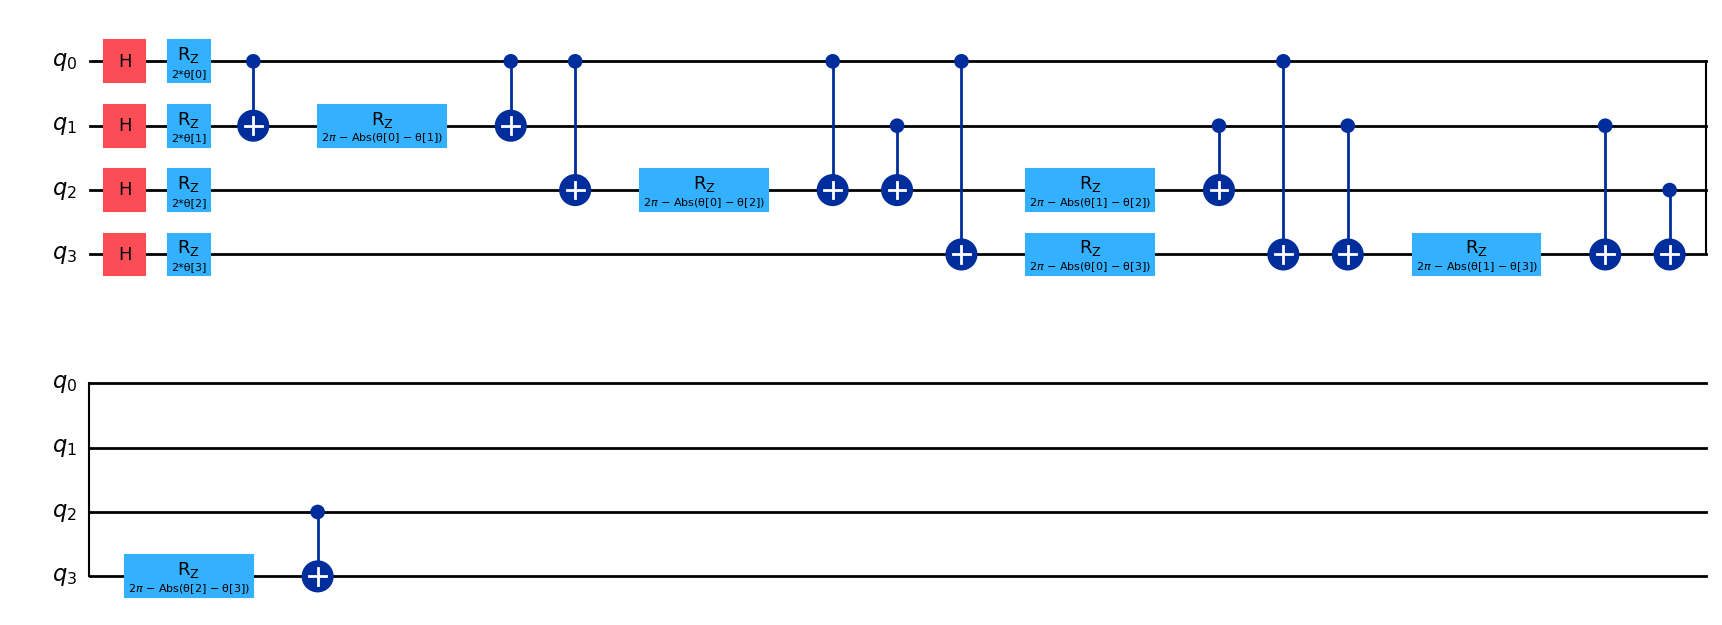

In [22]:
qc_optimizado = optimized_quantum_circuit()

qc_optimizado.draw('mpl')

In [23]:
# contruimos un circuito de swap test
def kernel_element( dato_1, dato_2,
                    backend=Estimator(options={'seed':1}), shots=1000  ):

    value = 0 # resultado por defecto
    # Se define un circuito cuántico de 9 qubits
    qc_swap_test = QuantumCircuit( 9 )

    # Preparamos los circuitos cuánticos para los datos
    qc_dato1 = qc_optimizado.copy().assign_parameters( dato_1)
    qc_dato2 = qc_optimizado.copy().assign_parameters( dato_2)

    # Combinamos los circuitos cuánticos de los dos datos a comparar
    qc_swap_test.compose( qc_dato1, qubits=[1,2,3,4], inplace=True )
    qc_swap_test.compose( qc_dato2, qubits=[5,6,7,8], inplace=True )

    # Se agrega la puerta Hadamard al qubit auxiliar
    qc_swap_test.h(0)

    # Aplicación de las puertas Controlled-Swap (CSWAP) entre qubits
    qc_swap_test.cswap(0,1,5)
    qc_swap_test.cswap(0,2,6)
    qc_swap_test.cswap(0,3,7)
    qc_swap_test.cswap(0,4,8)

    # Aplicamos nuevamente la puerta Hadamard al qubit auxiliar
    qc_swap_test.h(0)

    # Ejecutamos el circuito cuántico y obtenemos los resultados
    job= backend.run(qc_swap_test,SparsePauliOp(['IIIIIIIIZ'],[1]),shots=shots)
    value=job.result().values[0]


    return qc_swap_test, value

<ipython-input-23-f2c64d60f205>:3: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  backend=Estimator(options={'seed':1}), shots=1000  ):


1.0000000001628446


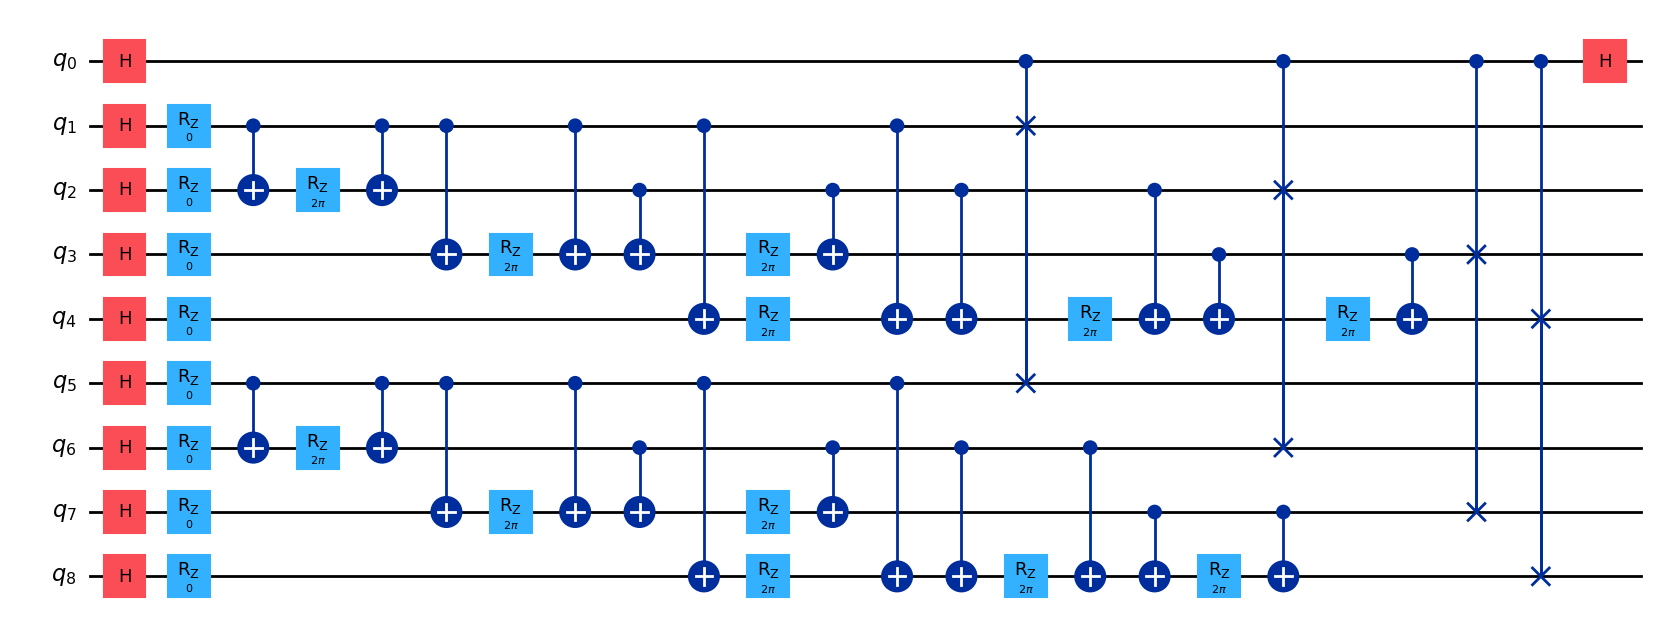

In [24]:
qc_swap_test, value = kernel_element( np.zeros(4), np.zeros(4) )
print( value )
qc_swap_test.draw('mpl')

In [25]:
# construimos kernel cuantico
def Quantum_Kernel( X_train, X_test=None,
                    backend=Estimator(options={'seed':1}), shots=1000 ):
    """
    X_train : vector bidimensional para entrenar
    X_test  : vector bidimensional para testear
    K_q     : Kernel cuantico
    backend : simulador o computador cuantico
    shots   : numero de shots
    """

    if X_test is None:
        X_test = X_train
    X_train = np.array(X_train)
    X_test  = np.array(X_test)

    # Inicializar la matriz de similitudes cuánticas
    K_q = np.zeros(( X_test.shape[0], X_train.shape[0]))

    values = []
    for x_test in X_test:
        for x_train in X_train:
            # Calcular el valor del kernel cuántico (swap test) entre los datos
            values.append( kernel_element( x_train, x_test,
                                            backend=backend, shots=shots )[1]  )

    l = 0
    for j, x_test in enumerate( X_test ):
        for k, x_train in enumerate( X_train):
            K_q[j,k] = values[l]
            l += 1

    return K_q

<ipython-input-25-04013155340f>:3: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  backend=Estimator(options={'seed':1}), shots=1000 ):


In [26]:
Kq_train = Quantum_Kernel( X_train )
Kq_test  = Quantum_Kernel( X_train, X_test )

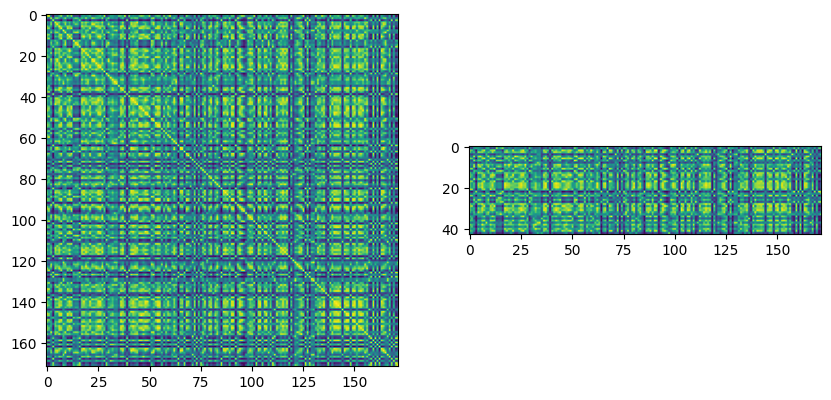

In [27]:
# Visualización de las matrices de similitudes
fig, ax = plt.subplots( 1, 2, figsize=(10,5) )
ax[0].imshow( Kq_train )
ax[1].imshow( Kq_test )

In [28]:
# esto va en el archivo de comprobacion de respuestas
def test_7c( Kq_train, y_train, Kq_test, y_test ):
    svm = SVC( kernel = 'precomputed' )
    svm.fit( Kq_train, y_train )
    Y_pred_quantum = svm.predict( Kq_test )
    # print( 'Fidelidad test:        ', svm.score( Kq_test, y_test ) )
    # if svm.score( Kq_test, y_test ) > 0.97:
    #     print('Tu discrimindor alcanza una calidad superior al 97%.')
    # else:
    #     print('Vuelve a los desafios anteriores para intentar mejorar tu discriminador.')
    quantum = confusion_matrix(y_test, Y_pred_quantum)

    ConfusionMatrixDisplay(confusion_matrix=quantum).plot();
    print(classification_report(y_test, Y_pred_quantum))

    return None

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.89      0.94        35

    accuracy                           0.91        43
   macro avg       0.83      0.94      0.87        43
weighted avg       0.94      0.91      0.91        43



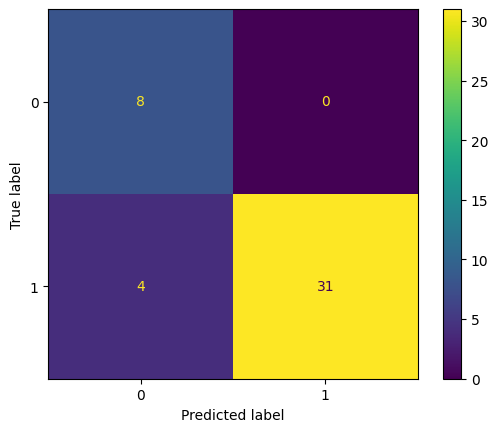

In [29]:
test_7c( Kq_train, y_train, Kq_test, y_test )

In [50]:
y_train.value_counts()

,count
spiral=1 elliptical=0,
1,132
0,40


In [51]:
y_test.value_counts()

,count
spiral=1 elliptical=0,
1,32
0,11
